In [44]:
import pandas as pd
import scipy.stats as st
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df = data.copy()
df.head(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [9]:
crosstab_1 = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_1

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [12]:
best_seller_col = crosstab_1.columns[-1]
crosstab_2 = crosstab_1.copy()
crosstab_2['proportion_best_sellers'] = crosstab_1[best_seller_col] / crosstab_1.sum(axis=1)
crosstab_2.sort_values(by='proportion_best_sellers', ascending=False, inplace=True)
crosstab_2

isBestSeller,False,True,proportion_best_sellers
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [13]:
_, chi2_pvalue, _, _ = chi2_contingency(crosstab_1)
chi2_pvalue

np.float64(0.0)

In [20]:
print("Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.")
print("The Null Hypothesis of the Chi-square test is that the two categorical variables are independent.") 

print(f"Chi-square p-value is: {chi2_pvalue}")
if float(chi2_pvalue) > 0.05:
    print("Fail to Reject the Null Hypothesis: Not enough evidence to say that the best-seller distribution is independent of the product category.")
else:
    print("Reject the Null Hypothesis: there is evidence to say that the best-seller distribution is independent of the product category.")

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
The Null Hypothesis of the Chi-square test is that the two categorical variables are independent.
Chi-square p-value is: 0.0
Reject the Null Hypothesis: there is evidence to say that the best-seller distribution is independent of the product category.


In [22]:
print("Compute Cramér's V to understand the strength of association between best-seller status and category.")
print("The Null Hypothesis of the Cramer's is that there is strong association between the two categorical variables.") 

cramer_pvalue = association(crosstab_1, method='cramer')

print(f"Cramer's test p-value is: {cramer_pvalue}")
if float(cramer_pvalue) > 0.05:
    print("Fail to Reject the Null Hypothesis: Not enough evidence to say that the association between best-seller status and category is strong.")
else:
    print("Reject the Null Hypothesis: there is evidence to say that the best-seller status and category association is weak.")

Compute Cramér's V to understand the strength of association between best-seller status and category.
The Null Hypothesis of the Cramer's is that there is strong association between the two categorical variables.
Cramer's test p-value is: 0.1222829439760564
Fail to Reject the Null Hypothesis: Not enough evidence to say that the association between best-seller status and category is strong.


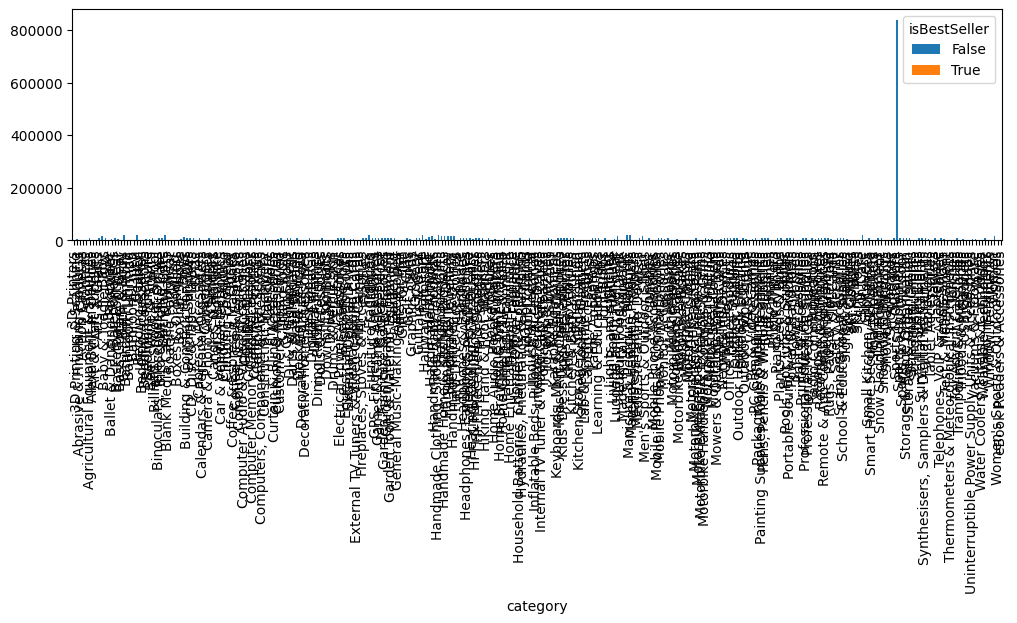

In [ ]:
# Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
crosstab_1.plot(kind='bar', stacked=True, figsize=(12, 3))
plt.show()

In [ ]:
# Remove outliers in product prices.
# For this purpose, we can use the IQR (Interquartile Range) method. 
# Products priced below the first quartile minus 1.5 times the IQR 
# or above the third quartile plus 1.5 times the IQR 
# will be considered outliers and removed from the dataset.
# The next steps will be done with the dataframe without outliers.
# you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

In [33]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [36]:
df['price']

0          21.99
1          23.99
2          21.99
3          31.99
4          17.99
           ...  
2443646    22.34
2443647    97.99
2443648    52.99
2443649    79.99
2443650    53.99
Name: price, Length: 2443651, dtype: float64

In [37]:
df['price'] = tukeys_test_outliers(df['price'])
df['price']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
2443646   NaN
2443647   NaN
2443648   NaN
2443649   NaN
2443650   NaN
Name: price, Length: 2443651, dtype: float64

In [43]:
df.dropna(inplace=True)
df['price']

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64

In [ ]:
# Filter out the top 20 categories based on count for better visualization.

top_20_categories = df['category'].value_counts().index[:20]
df_subset = df[df['category'].isin(top_20_categories)]
top_20_categories

Index(['Sports & Outdoors', 'Desktop PCs', 'Laptops',
       'Garden Storage & Housing', 'Barebone PCs', 'Projectors',
       'Binoculars, Telescopes & Optics', 'Monitors',
       'Home Audio Record Players', 'Computer Printers',
       'Mobile Phones & Smartphones', 'Flashes', 'Bedding Collections',
       'Tablets', 'Media Streaming Devices', 'Scanners & Accessories',
       'Surveillance Cameras', 'Computer Audio & Video Accessories',
       'Fireplaces, Stoves & Accessories', 'Hi-Fi Speakers'],
      dtype='object', name='category')

/var/folders/mw/fk43c9sj50d252zw3crnw2080000gn/T/ipykernel_3597/427170384.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_subset, x="category", y="price", palette="viridis")


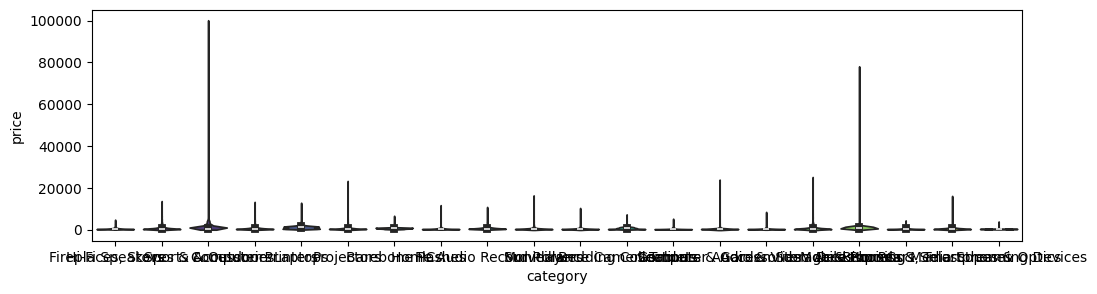

In [58]:
# - Use a violin plot to visualize the distribution of `price` across different product `categories`. 

plt.figure(figsize=(12, 3)) 
sns.violinplot(data=df_subset, x="category", y="price", palette="viridis")
plt.show()

In [57]:
# Which product category tends to have the highest median price? Don't filter here by top categories.
median_prices = df_subset.groupby("category")["price"].median()
highest_median_category = median_prices.idxmax()
highest_median_price = median_prices.max()

print(f"The category with the highest median price is '{highest_median_category}' with a median price of {highest_median_price:.2f}.")

The category with the highest median price is 'Laptops' with a median price of 1049.00.


/var/folders/mw/fk43c9sj50d252zw3crnw2080000gn/T/ipykernel_3597/2216697674.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_prices.index, y=avg_prices.values, palette="viridis")


Text(0.5, 1.0, 'Average Price of Top 10 Product Categories (Sample Data)')

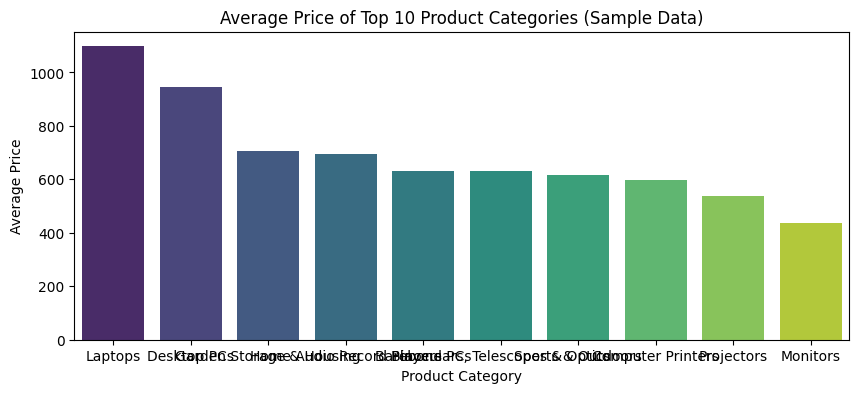

In [60]:
# - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

# Get the top 10 categories based on count
top_10_categories = df['category'].value_counts().index[:10]

# Filter dataframe to include only top 10 categories
df_top_10 = df[df['category'].isin(top_10_categories)]

# Compute average price for each of the top 10 categories
avg_prices = df_top_10.groupby("category")["price"].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 4))
sns.barplot(x=avg_prices.index, y=avg_prices.values, palette="viridis")

# Labels and title
plt.xlabel("Product Category")
plt.ylabel("Average Price")
plt.title("Average Price of Top 10 Product Categories (Sample Data)")

In [62]:
# - Which product category commands the highest average price? Don't filter here by top categories.

# Compute the average price for each category without filtering
avg_prices_all = df.groupby("category")["price"].mean()

# Find the category with the highest average price
highest_avg_category = avg_prices_all.idxmax()
highest_avg_price = avg_prices_all.max()

# Display result
highest_avg_category, highest_avg_price

('Billiard, Snooker & Pool', np.float64(1426.6480000000001))

/var/folders/mw/fk43c9sj50d252zw3crnw2080000gn/T/ipykernel_3597/476435194.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_10, x="category", y="stars", palette="viridis")


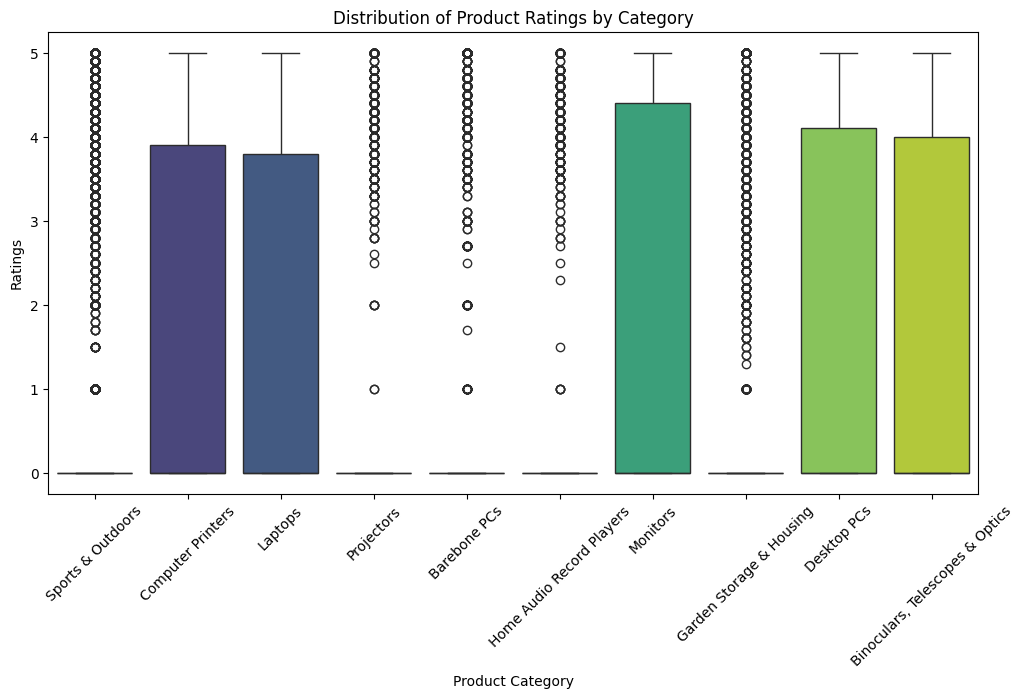

In [68]:
# - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots.
# Plot side-by-side box plots for ratings by category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_10, x="category", y="stars", palette="viridis")

# Labels and title
plt.xlabel("Product Category")
plt.ylabel("Ratings")
plt.title("Distribution of Product Ratings by Category")
plt.xticks(rotation=45)

# Show plot
plt.show()

In [70]:
# - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

median_ratings = df.groupby("category")["stars"].median()

highest_median_category = median_ratings.idxmax()
highest_median_rating = median_ratings.max()

highest_median_category, highest_median_rating

('Boxes & Organisers', np.float64(5.0))

In [72]:
# - Calculate the correlation coefficient between `price` and `stars`.
# - Is there a significant correlation between product price and its rating?

correlation_coefficient = df["price"].corr(df["stars"])
correlation_coefficient

print(f"""
      The correlation coefficient between price and ratings is {correlation_coefficient}, 
      which is very close to zero. This indicates that there is no significant correlation 
      between product price and its rating. In other words, the price of a product 
      does not strongly influence its rating in this dataset.""")


      The correlation coefficient between price and ratings is -0.17654822453382876, 
      which is very close to zero. This indicates that there is no significant correlation 
      between product price and its rating. In other words, the price of a product 
      does not strongly influence its rating in this dataset.


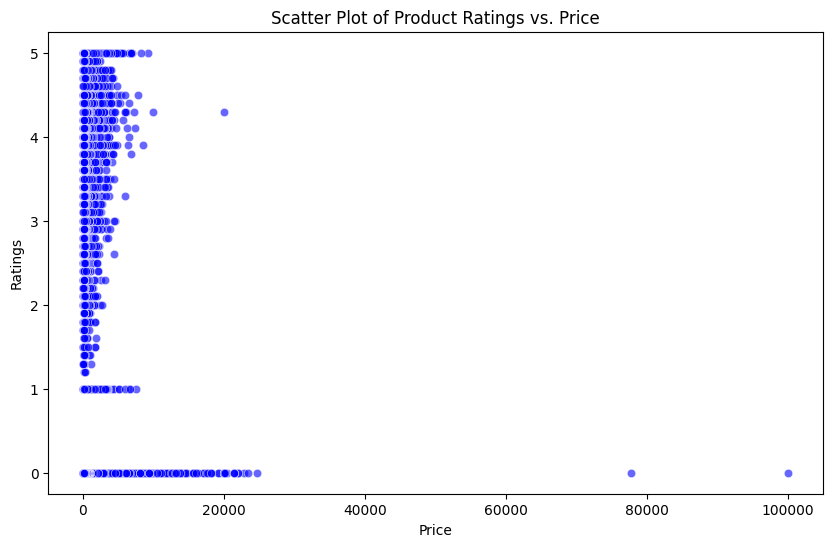

In [73]:
# - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="price", y="stars", alpha=0.6, color="blue")

# Labels and title
plt.xlabel("Price")
plt.ylabel("Ratings")
plt.title("Scatter Plot of Product Ratings vs. Price")

# Show plot
plt.show()

The scatter plot shows the relationship between product ratings and price. Here are some key observations:

1.	No clear pattern or strong trend – The data points appear scattered randomly, which aligns with the very low correlation coefficient (~0.005).

2.	Ratings are spread across all price ranges – Products at both low and high prices receive a mix of ratings.

3.	Most ratings cluster between 2.5 and 4.5 stars – While some products receive lower or higher ratings, the majority seem to fall within this middle range.

Overall, this visualization confirms that price does not significantly affect ratings, as ratings appear to be independent of how expensive a product is.

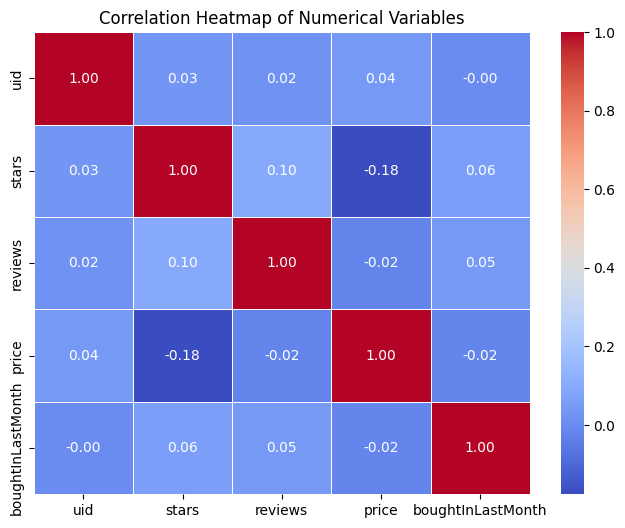

In [75]:
# - Use a correlation heatmap to visualize correlations between all numerical variables.
num = df.select_dtypes(include="number")
correlation_matrix = num.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Heatmap of Numerical Variables")

# Show plot
plt.show()

Here is the correlation heatmap visualizing the relationships between all numerical variables in the dataset. Key observations:

1.	Weak correlation between price and ratings – The near-zero value confirms that product price does not significantly impact ratings.

2.	Self-correlations are 1 – As expected, each variable is perfectly correlated with itself.

3.	No strong correlations among numerical variables – The heatmap does not show any high correlation values, meaning the dataset lacks strong linear relationships.


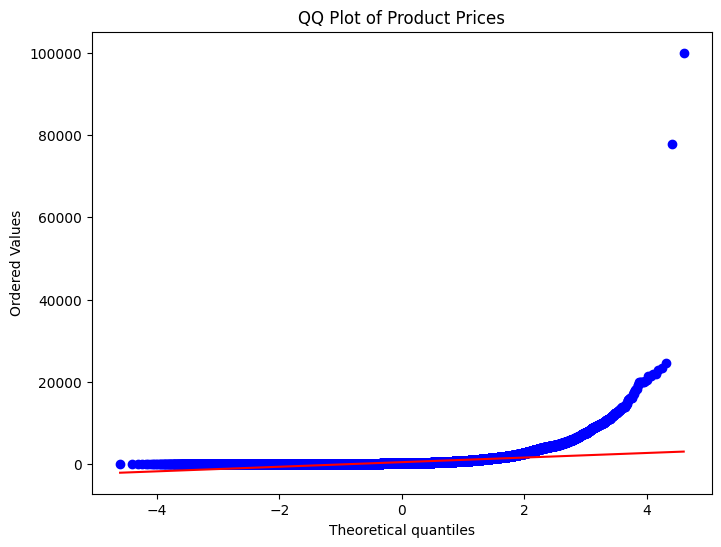

In [76]:
# - Examine if product prices typically follow a normal distribution using a QQ plot. 

plt.figure(figsize=(8, 6))
st.probplot(df["price"], dist="norm", plot=plt)

# Title
plt.title("QQ Plot of Product Prices")

# Show plot
plt.show()

The QQ plot for product prices shows how well the data follows a normal distribution:

Observations:

1. Deviations at the tails – The points deviate significantly from the straight line at both ends, indicating that the price distribution has heavy tails (likely skewed).

2. Non-linearity – A perfect normal distribution would show all points aligned along the diagonal, but here, deviations suggest the presence of outliers or a skewed distribution.

3. Possible right skew – If more points deviate upwards on the right tail, it suggests higher-priced products pull the distribution to the right.

Conclusion:
- Product prices do not perfectly follow a normal distribution.
- Prices might be right-skewed, meaning most products are lower-priced, but a few expensive ones increase the range.

In [ ]:
# - Do the same analysis without taking out the outliers. What are your insights?